# Project: Investigate the No Show Appointments Dataset 

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

We are exploring the [Medical Appointmment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments) data from [Kaggle](https://www.kaggle.com). The Dataset contains over **100,000** medical appointments with **14** associated variables (characteristics), with the most important varible being the `No-Show` variable describing if the patients show or do not up to the appointments.

Below is a detailed description on the  variables:
> **1. PatientId -** Unique identification for each patient
>
> **2. AppointmentID -** Unique identification of each appointment
>
> **3. Gender -** Male or Female
>
> **4. ScheduledDay -** The day of the actual appointment, when they have to visit the doctor.
>
> **5. AppointmentDay -** The day someone called or registered the appointment, this is before appointment of course.
>
> **6. Age -** How old the patient is.
>
> **7. Neighbourhood -** Where the appointment takes place.
>
> **8. Scholarship -** A `True` or `False` value . Observation, this is a broad topic, consider reading this article [view](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
>
> **9. Hipertension -** A `True` or `False` to whether the patient has hypertension
>
> **10. Diabetes -** A `True` or `False` to whether the petient is diabetic
>
> **11. Alcoholism -** A `True` or `False` to whether the patient is an alcoholic
>
> **12. Handcap -** Number of handicaps that the patient exhibits
>
> **13. SMS_received -** A `True` or `False` whether any messages were sent out to the patient.
>
> **14. No-show -** A `Yes` or `No` answer to if whether a patient was a ***No show*** for the appointment.   

In [98]:
# Import the need packages for this data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set plots to be shown inline
%matplotlib inline

# Use seaborn's darkgird theme
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

We will import the data and examine in detail to determine any modifications that may be made by to prepare it for analysis in this section.

General, we will be cleaning the data and inspecting it for data integrity.

### General Properties

In [25]:
# Load the dataset
# There are two datetime columns, 'ScheduledDay' & 'AppointmentDay'
# that need to be parsed in as datetime object
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])
# view the first few lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
# Investigate the dimension of the dataframe
df.shape

(110527, 14)

In [27]:
# Investigate the uniqueness values of each variable
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [28]:
# Investigate the data types of the variables
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

The dataset has ***110,527*** observations and ***14*** variables, with all most of the variables having *2* unique values except the `PatientId` with *62,299*, `AppointmentID` with *110,527*, `ScheduledDay` with *103,549*, `AppointmentDay` with *27*, `Age` with *104*, `Neighbourhood` with *81* and `Handcap` with 5.

Looking at the data types of the columns, the `PatientId` is of type `float`, the `AppointmentID`, `Age`, `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap` and `SMS_recieved` are of type `int`, the `Neighbourhood` and `No-show` are of type `object`, and finally, the `ScheduledDay` and `AppointmentDay` are correctly parsed as type `datetime`.

In [29]:
# Investigate the null values in the dataset
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [30]:
# Investigate if there are any duplicates in our data
df.duplicated().sum()

0

In [31]:
# View the information of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

The are neither any `null` values or duplicates in our dataset. And also, the `info` method emphizes the same.

### Data Cleaning

After exploring this dataset, we can observe that:

* The `AppointmentID` variable is only use to identify each appointment, hence the making each one of its value unique.
* We need to create new datetime fearure eg. day, month, year, hour etc
* we need to rename the columns to have pythonic names

In [32]:
# Drop the 'AppointmewntId' column
df.drop(['AppointmentID'], axis=1, inplace=True)

In [33]:
# rename the columns appropriately
col_names = list(map(
    lambda x: x.replace('id', '_id').replace('day', '_day'),
    df.columns.str.replace('-', '_').str.lower().tolist()))
df.columns = col_names
df.rename(columns = {'hipertension': 'hypertension', 'handcap': 'handicap'}, inplace=True)

In [34]:
df.duplicated().sum()

618

Now, investigating the duplicates after dropping the `AppointmentID`, there are 618 duplicates now that were not there previous. This means that some appointments made as duplicates with different unique appointment ids.

Then, the duplicates can be dropped if we think there will influence the results of our analysis

In [35]:
# View the description summary of the dataset
df.loc[:,'age':'no_show'].describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


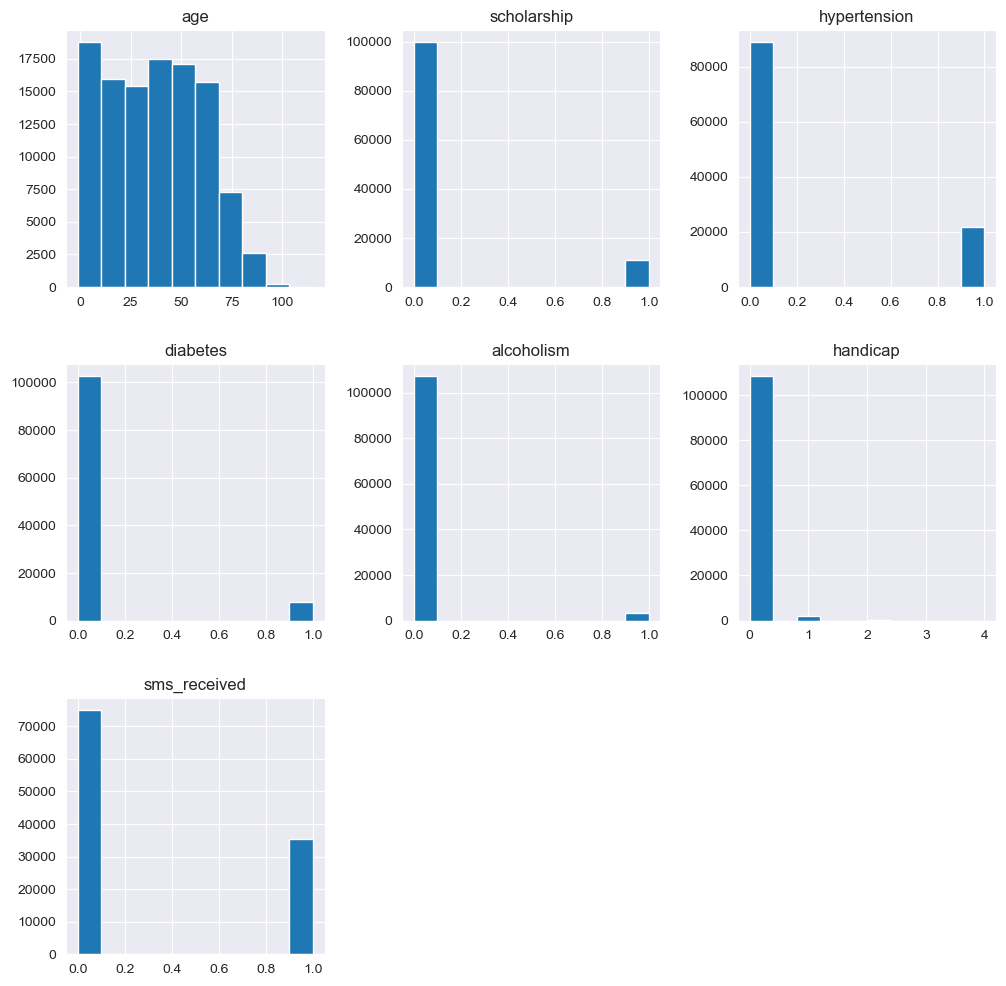

In [36]:
# View the distribution of the relevant columns
df.loc[:,'age':'no_show'].hist(figsize=(12,12));

The average age of the patients is **37** with the minimum age being **-1**, while the maximum age being **115**. For the maximum age it raises doubts, but is plausible to have people age that old. but for the minimum age, no person can have a negative age and thus raises data quality issue. Thus we can assume a that the **-1** age has special meaning of someone not providing their age and represents null ages or we can assume a data entry error and drop the observations.

In [37]:
# Exploring further the age column
df.groupby('age', as_index=False)['patient_id'].count().rename(columns={'patient_id':'no_of_patients'})

,age,no_of_patients
0,-1,1
1,0,3539
2,1,2273
3,2,1618
4,3,1513
...,...,...
99,98,6
100,99,1
101,100,4
102,102,2


In [38]:
# We can see that the observations with negative ages are just 1
# Filtering the observation with age less than 0
df[df.age < 0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


After exploring the age column for its data quality isssues, we can safely leave the observation, since it has a `No` value for the `no-show` column, and the analysis is more interested in the `yes` values for the column. The observation might also provide great insights on other variables in the observations.

#### Creating New variables (columns)
To answer some of the research questions, we need to create new columns from our `appointment_day` and `schedule_day` columns. When we invstigate further, we note that the `appointment_day` data does not have a time component (the time defaults to midnight for all appointments). Hence there is no way to estimate any time difference apart from days.

Now, let's create the columns we need

1. `appointment_weekday_name` column from the `appointment_day` for our week days
2. `duration_after_schedule` column from both the `schedule_day` and `appointment_day` columns for the duration remaining to the appointment day from the day of the appointment. We will need to classify these to approximate and appropriate durations such as hours, days and weeks.

In [138]:
# create the appointment_weekday_name column
df['day_of_week_of_appointment'] =  df.appointment_day.dt.day_name()

# create the duration_after_schedule column and convert the duration into hours
# We need to convert the appointment_day and scheduled_day columns to date objects
df['duration_after_schedule'] = (df.appointment_day.dt.date - df.scheduled_day.dt.date)

# view the new dataframe
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_weekday_name,duration_after_schedule,duration_after_schedule_classified,day_of_week_of_appointment
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0 days,1 day,Friday
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0 days,1 day,Friday
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0 days,1 day,Friday
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0 days,1 day,Friday
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0 days,1 day,Friday


In [141]:
# Let's explore the new appointment_weekday_name column
df.day_of_week_of_appointment.describe()

count        110527
unique            6
top       Wednesday
freq          25867
Name: day_of_week_of_appointment, dtype: object

In [142]:
# Let's explore the new duration_after_schedule column
print(df.duration_after_schedule.nunique())
df.duration_after_schedule.describe()

131


count                        110527
mean     10 days 04:24:31.828602965
std      15 days 06:07:11.673762786
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: duration_after_schedule, dtype: object

Exploring the new columns, we observe that the `duration_after_schedule` column has over ***89,712*** values, with the minimum value being *-1,578 hours* and the maximum *42,853 hours*. We need to then go further to classify the to appropriate categories.

In [143]:
# creating a function to classify our durations to appropriate classes
def classify_duration(d):
    """
    Returns the durations in categories of a day, a week, a month, 3 months and more than 3 months.
            Parameters:
                    d (timedelta): A timedelta object
            Returns:
                    (str): string object as description
    """
    if d <= pd.to_timedelta(1, unit='D'):
        return '1 day'
    elif d <= pd.to_timedelta(7, unit='D'):
        return '1 week'
    elif d <= pd.to_timedelta(30, unit='D'):
        return '1 month'
    elif d <= pd.to_timedelta(90, unit='D'):
        return '3 months'
    else:
        return '> 3 months'

In [173]:
# Now let's classify our duration appropriately
df['duration_after_schedule'] = df.duration_after_schedule.apply(classify_duration)
df.duration_after_schedule.unique()

array(['1 day', '1 week', '1 month', '3 months', '> 3 months'],
      dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis



Now after looking into our data and the streamlining it for our analysis, let us dive into exploring the data for insights.

Our goal is to be able to answer the following research questions:

1. What is the percentage of the scheduled appointments that are a no-show?
2. What groups of patients are a no-show for their scheduled appointments more often?
3. Does day of the  of the scheduled appointment  and duration between the schedule day and appointment day affect the number of appointments with no-show?
4. How does sending an sms for the scheduled appointment have an effect to the no-show appointments?

In [174]:
# first let's look at the correlation of no_show to the other columns
df_corr = df.copy()
df_corr['no_show'] = df_corr.apply(lambda x: 1 if x['no_show'] == 'No' else 0, axis=1)
df_corr.corr(numeric_only=True)[['no_show']].sort_values('no_show')

,no_show
sms_received,-0.126431
scholarship,-0.029135
alcoholism,0.000196
patient_id,0.001461
handicap,0.006076
diabetes,0.015180
hypertension,0.035701
age,0.060319
no_show,1.000000


We observe that no_shows and sms_recieved have a negative correlation of more that *-0.05* to the no_shows while age has a positive correlation of more than *+0.05* to the no_shows.

### Research Question 1: What is the percentage of the scheduled appointments that are a no-show?

In [205]:
# group the data by no_show and get the proportions
no_show_distr = (df[['no_show']].value_counts().rename('counts').reset_index()
                    .assign(percentage=df['no_show'].value_counts(normalize=True).mul(100).round(2).values))
no_show_distr

,no_show,counts,percentage
0,No,88208,79.81
1,Yes,22319,20.19


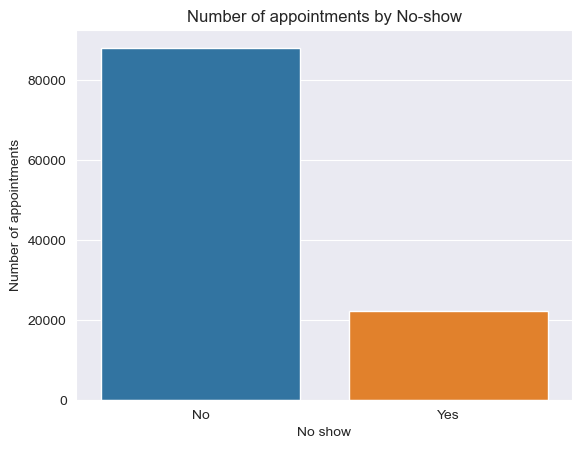

In [206]:
# plot a barchart for the distributions
fig = sns.barplot(no_show_distr, x='no_show', y='counts');
fig.set_title('Number of appointments by No-show');
fig.set_xlabel('No show');
fig.set_ylabel('Number of appointments');

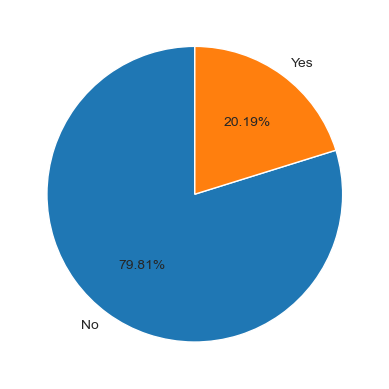

In [207]:
# plot a pie char for the percentage
plt.title = 'Percentage of No-shows'
plt.pie(no_show_distr['percentage'],
        labels=no_show_distr.no_show,
        autopct='%1.2f%%',
        startangle=90,
        explode=[0 if i != 'Yes' else 0.1 for i in no_show_distr.index]
       );

We observe that **22,319**  of all appointments, approximately **20.19%** representation, are No-show appointments.

### Function to manipulate dataframe and create visuals

Before we start creating our visuals for the questions below, we need to create a function that is going to manipulate the dataframes and create the visuals we will need.

In [208]:
def create_visuals(df, x_var, vert_plots=False, table=True, dodge=True, order=None, xticklabels=None):
    """
    Returns a matplotlib fig as a visual. It also will return a table for the visuals
        Parameters:
            df (pandas DataFrame): the dataframe to maniuplate 
            x_var (str): a string representing the column to group and visualize by
            vert_plot (tuple) [optional]: whether we will have 2 rows instead of 2 columns for the subplots
            table (bool) [optional]: whether we need to show the aggregated dataframe as a table
            dodge (bool) [optional]: When hue nesting is used, whether elements should be shifted along the categorical axis
            order (list) [optional]: a list to use to order the x axis with.
            xticklabels (optional) [None]: a list to use to label the x axis ticks with.
        Returns:
            (mathplotlib figure object): a mathplotlib visual
    """
    # Group the appointments by x_var and count values by no_show
    # rename the series to count and reset index to generate a dataframe
    # create a new column with percentages and assign it as a new column to the dataframe
    data = (df.groupby(x_var)['no_show'].value_counts().rename('count').reset_index()
             .assign(percentage=df.groupby(x_var)['no_show'].value_counts(normalize=True).mul(100).values))
    
    # print the dataframe as a table
    if table==True:
        display(data)

    # Visualize result
    if vert_plots==True:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))       
    
    for ax, bar in zip((ax1, ax2),['count', 'percentage']):
        sns.barplot(data, x=x_var, y=bar, hue='no_show', ax=ax, dodge=dodge, order=order);
        ax.set_title(f'{bar} Distribution by {x_var.replace("_", " ")} and No-show'.title(), weight='bold');
        ax.set_xlabel(f'{x_var.replace("_", " ").title()}');
        ax.set_ylabel(f'{"number" if bar=="count" else bar} of appointments'.title());
        ax.legend(title='No-Show');
        if xticklabels != None:
            ax.set_xticklabels(xticklabels)
        
    # show plot
    return plt.show()

### Research Question 2: What groups of patients are a no-show for their scheduled appointments more often?

#### Appointment Distribution by Age and No-show

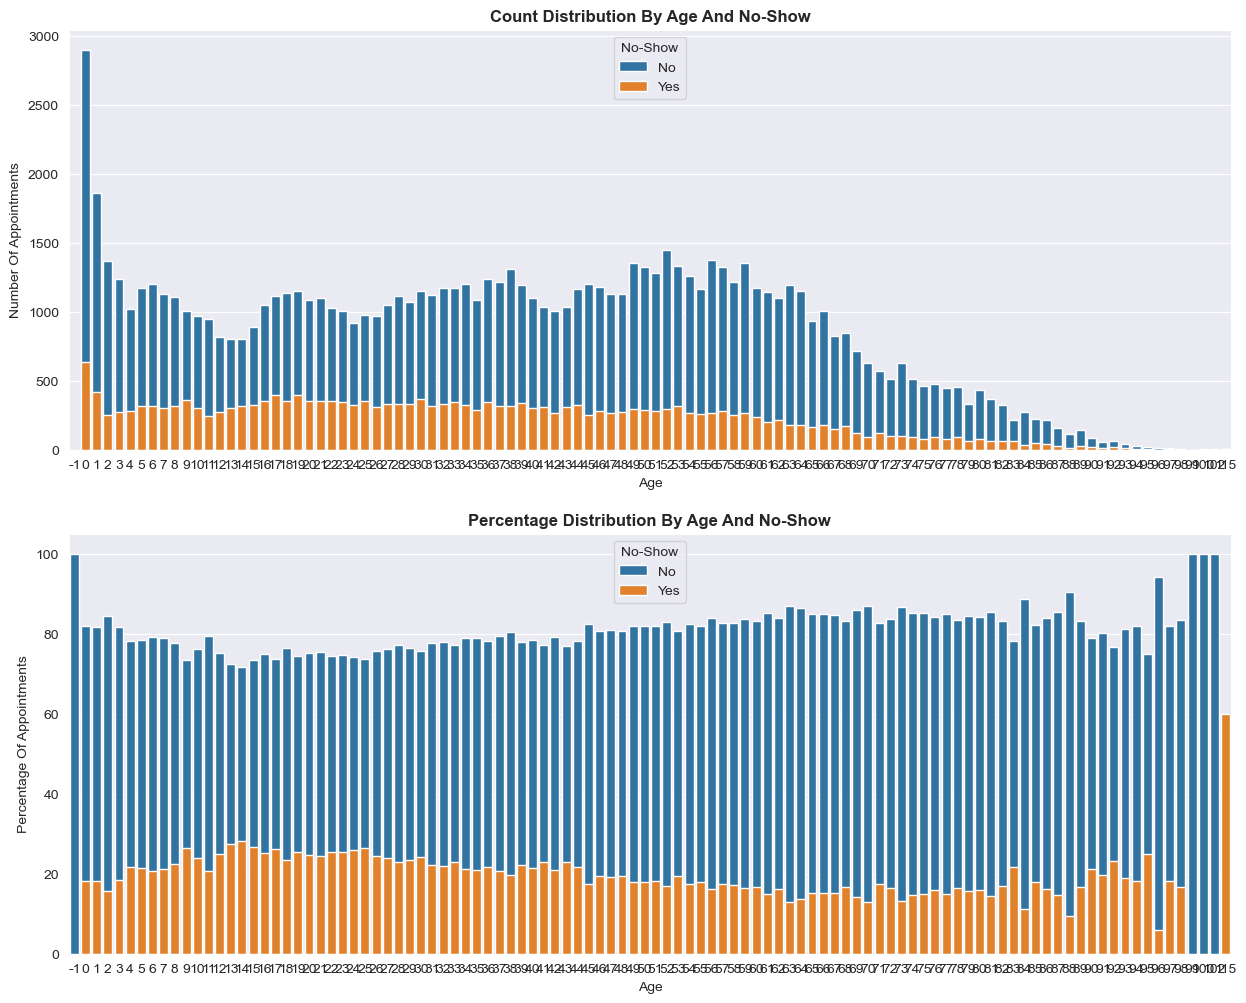

In [209]:
# Create the visuals for the age column
create_visuals(df, 'age', vert_plots=True, table=False, dodge=False)

Although, young patients have some of the lowest number of appointments, the have one of the highest perecentage proportions of their age sets with No-show appointments. Also we can see that the No-shows distribution decreases gently towards as age increases.

#### Appointment Distribution by Gender and No-show

,gender,no_show,count,percentage
0,F,No,57246,79.685412
1,F,Yes,14594,20.314588
2,M,No,30962,80.032052
3,M,Yes,7725,19.967948


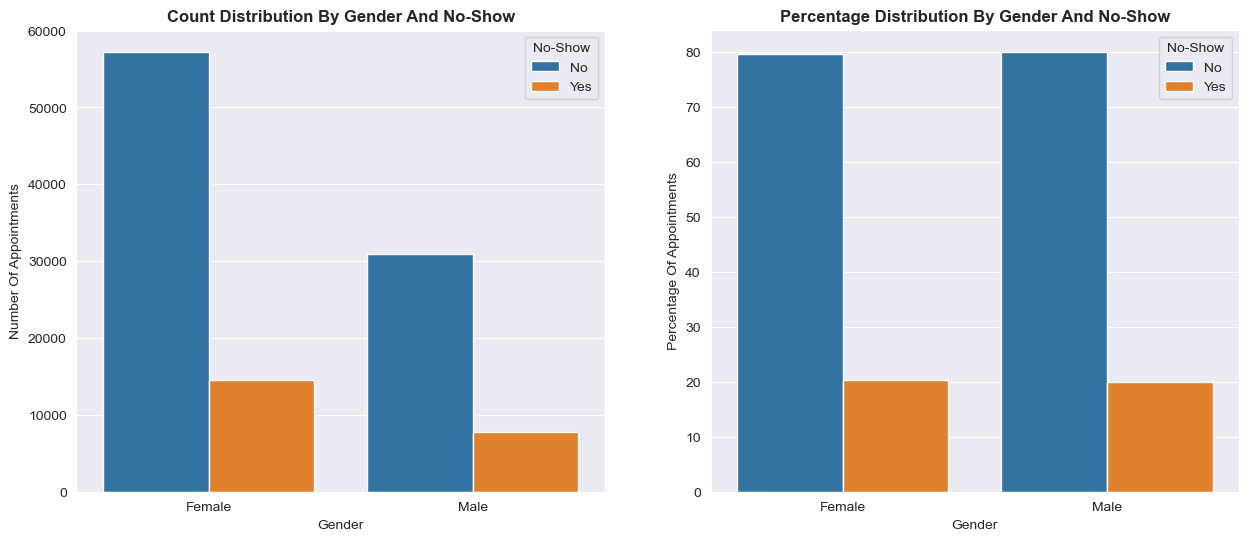

In [180]:
# Create the visuals for the gender column
create_visuals(df, 'gender', xticklabels=['Female', 'Male'])

Although, the number of female patient appointments are almost double of their male counterpart, the percentage proportion of the No-show appointments are almost the same for both genders, about **20.00%** of their respective genders.

#### Appointment Distribution by Handicap and No-show

,handicap,no_show,count,percentage
0,0,No,86374,79.764697
1,0,Yes,21912,20.235303
2,1,No,1676,82.076396
3,1,Yes,366,17.923604
4,2,No,146,79.781421
5,2,Yes,37,20.218579
6,3,No,10,76.923077
7,3,Yes,3,23.076923
8,4,No,2,66.666667
9,4,Yes,1,33.333333


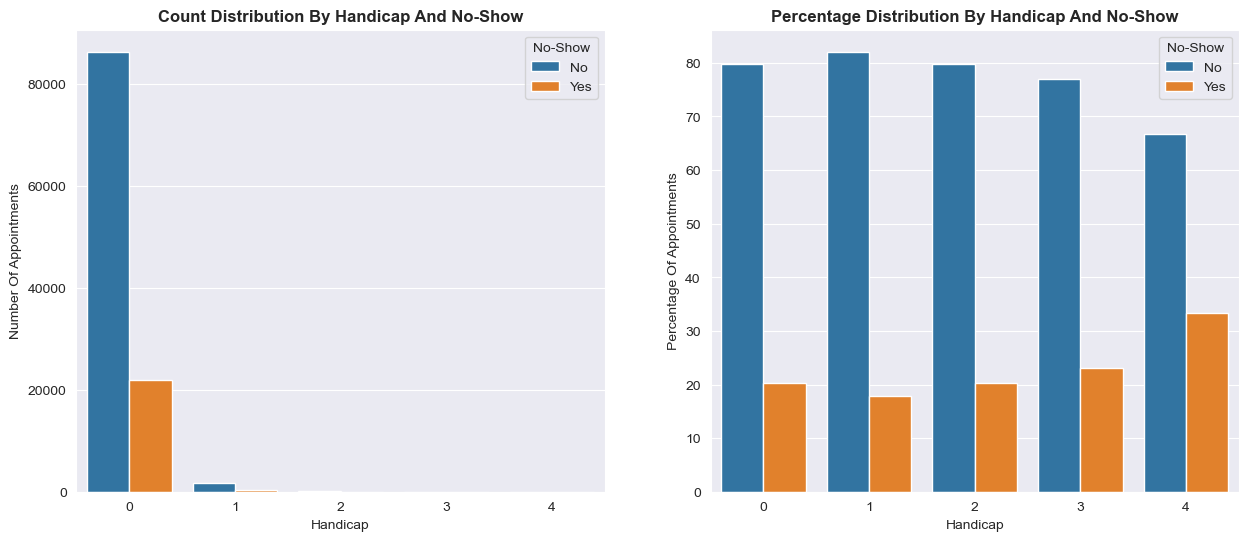

In [181]:
# Create the visuals for the handicap column
create_visuals(df, 'handicap')

A majority of our patients are not handicap, over **90,000** of the appointments. But of the handicap categories (1-4), the category handicap 4 has the highest percentage proportion. But wwe should note also that the category 3 and 4 handicap have a total of 16 appointments in total, which is insignficant number to base any deductions. Hence, this variable might not give meaningful insights to conclude any effects on the No-show appointments

#### No-show distribution of apointments for patients on scholarship

,scholarship,no_show,count,percentage
0,0,No,79925,80.192844
1,0,Yes,19741,19.807156
2,1,No,8283,76.263696
3,1,Yes,2578,23.736304


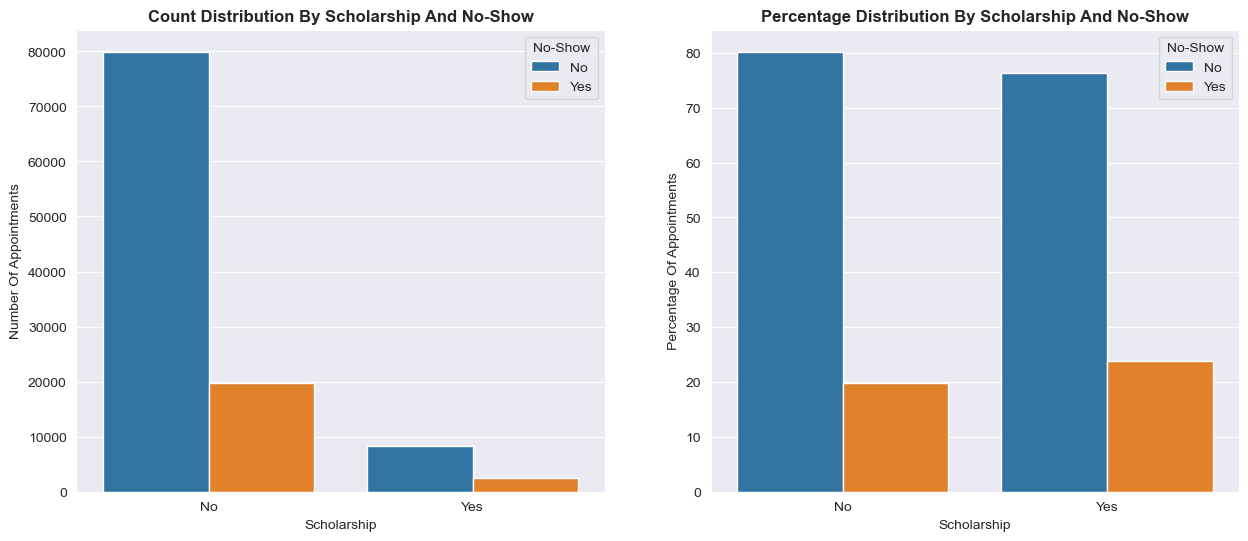

In [182]:
# Create the visuals for the scholarship column
create_visuals(df, 'scholarship', xticklabels=['No', 'Yes'])

The patients under scholarship are a minority representation of the appoiuntments but we observe that significant percentage of them **23.7%** are a No-show appointments compared to those under no scholarship, a **19.8%**, which is significantly lower.

#### No-show distribution of apointments for the hypertensive patients

,hypertension,no_show,count,percentage
0,0,No,70179,79.096319
1,0,Yes,18547,20.903681
2,1,No,18029,82.698041
3,1,Yes,3772,17.301959


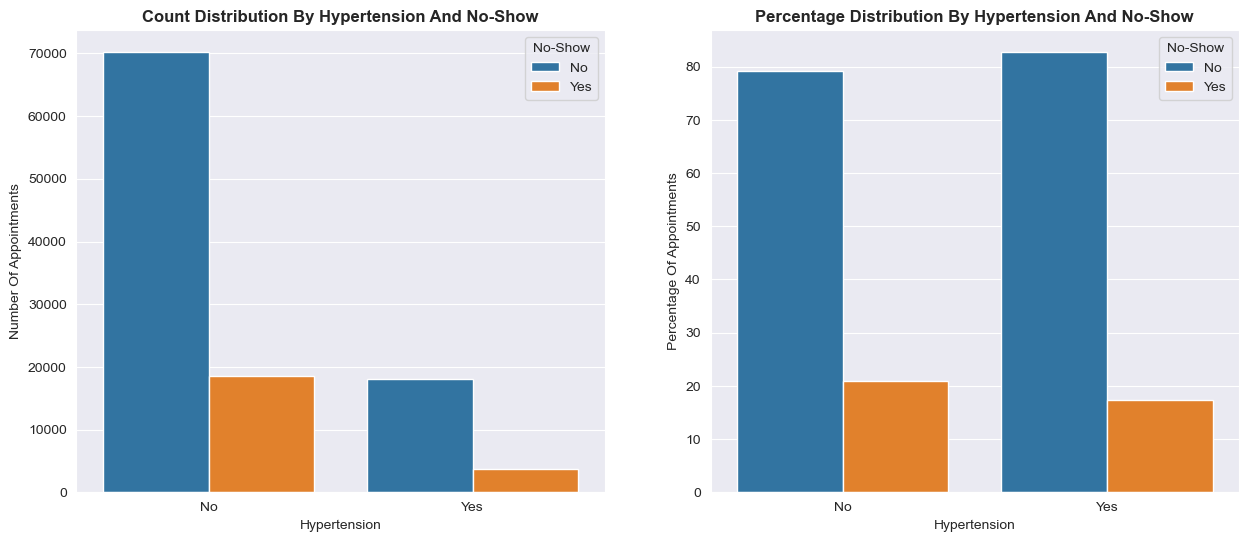

In [183]:
# Create the visuals for the hypertension column
create_visuals(df, 'hypertension', xticklabels=['No', 'Yes'])

Hypertensive patient appointments have a low No-show percentage proportion, a **17.3%** - significantly lower than the overall No-show percentage. This implies that these patients often show for their appointments

#### No-show distribution of apointments for the diabetic patients

,diabetes,no_show,count,percentage
0,0,No,81695,79.637175
1,0,Yes,20889,20.362825
2,1,No,6513,81.996727
3,1,Yes,1430,18.003273


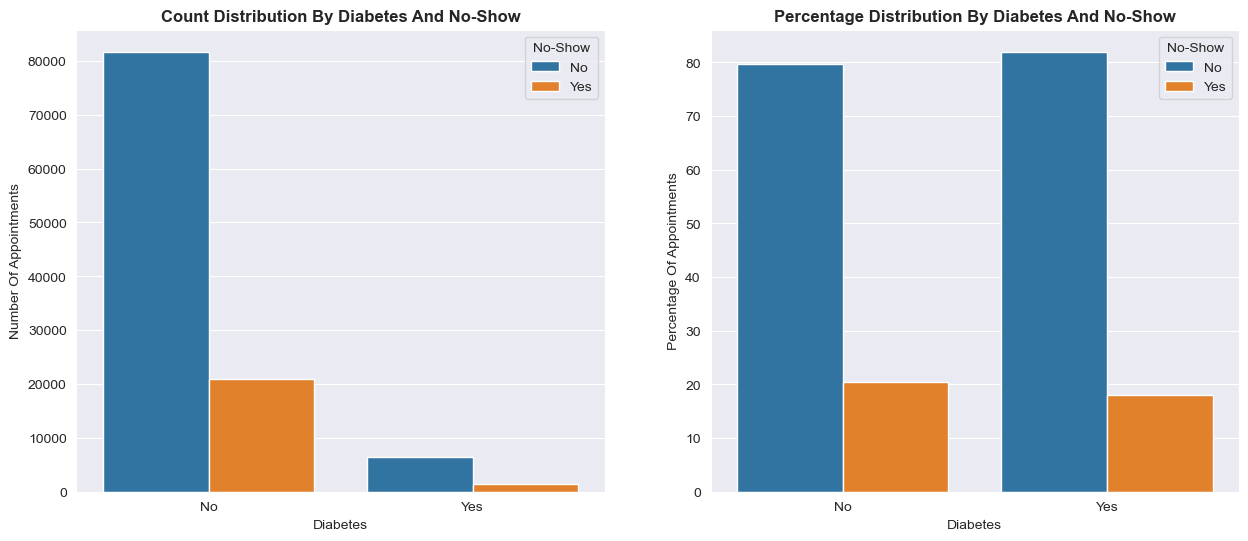

In [184]:
# Create the visuals for the diabetes column
create_visuals(df, 'diabetes', xticklabels=['No', 'Yes'])

Also diabetic patient appointments have a low No-show percentage proportion, a **18.0%** - significantly lower than the overall No-show percentage. This implies that these patients often show for their appointments

#### No-show distribution of apointments for the alcoholic patients

,alcoholism,no_show,count,percentage
0,0,No,85525,79.805351
1,0,Yes,21642,20.194649
2,1,No,2683,79.851190
3,1,Yes,677,20.148810


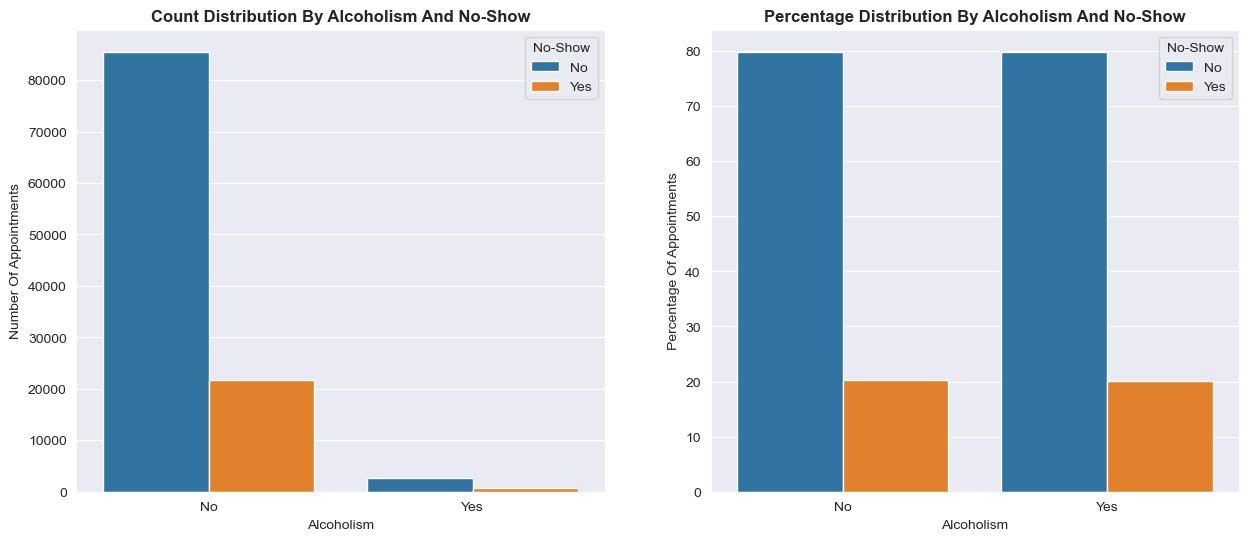

In [185]:
# Create the visuals for the alcoholism column
create_visuals(df, 'alcoholism', xticklabels=['No', 'Yes'])

Although, Alcoholic patients appointments constitute some of the lowest categories (only about 2,500 appointments), the percentage proportion of the No-show appointments are almost the same as the non-alcoholic patient appointments.

### Research Question 3: Does day of the of the scheduled appointment and duration between the schedule day and appointment day affect the number of appointments with no-show?

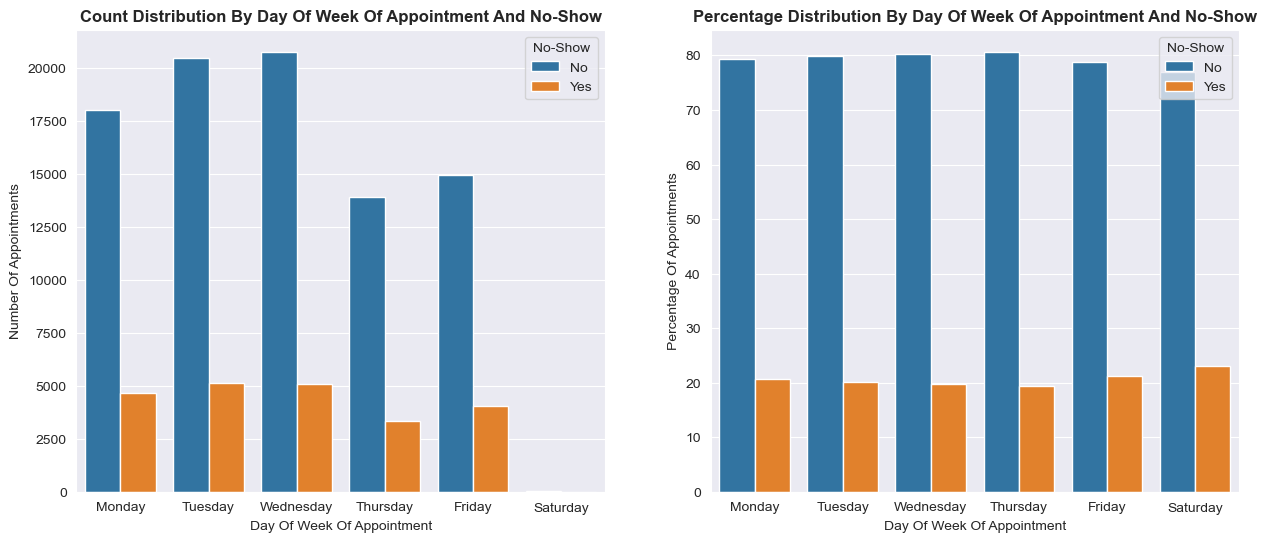

In [186]:
# Create the visuals for the day_of_week_of_appointment column
create_visuals(df, 'day_of_week_of_appointment', table=False,
               order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

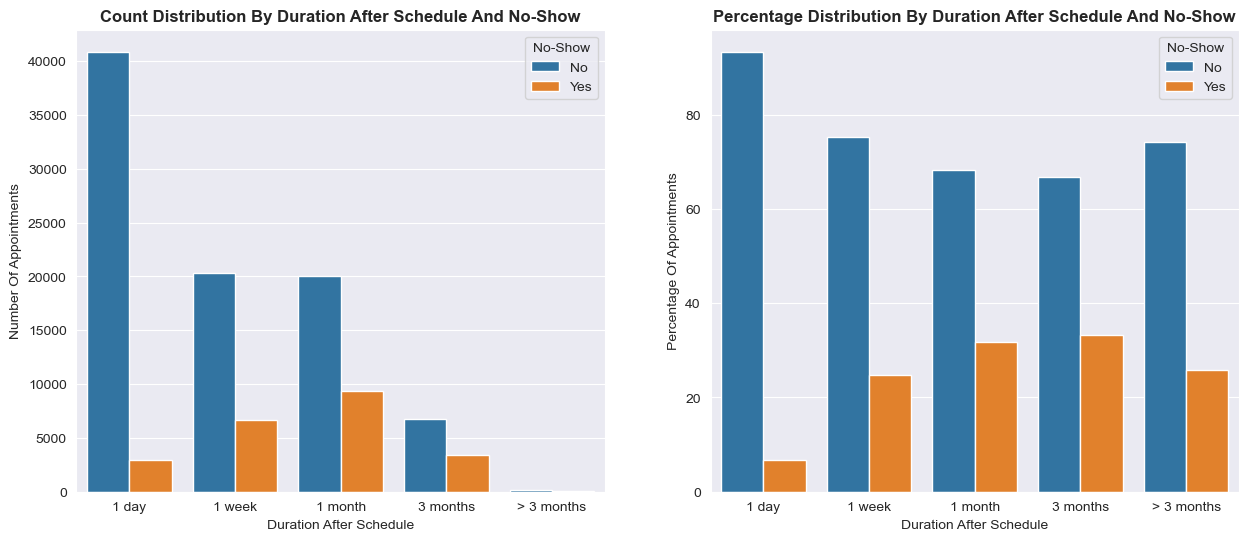

In [189]:
# Create the visuals for the duration_after_schedule column
create_visuals(df, 'duration_after_schedule', table=False, order=['1 day', '1 week', '1 month', '3 months', '> 3 months'])

Although, the slightly higher number of appointments are made at the start of working week than towards the weekend, the percentage proportion of No-show appointments are the reverse of this, with saturday and firday seeing slightly higher No-show appointments than the start of the week appointments.

Also, appointments made further into the future (here 1 month or more) tend to show high percentage proportions of No-show appointments. Also note that one day appointments about a quarter less peercentage proportion of the No-show appointments than the next least percetage proportion.

### Research Question 4: How does sending an sms for the scheduled appointment have an effect to the no-show appointments?

,sms_received,no_show,count,percentage
0,0,No,62510,83.296689
1,0,Yes,12535,16.703311
2,1,No,25698,72.425455
3,1,Yes,9784,27.574545


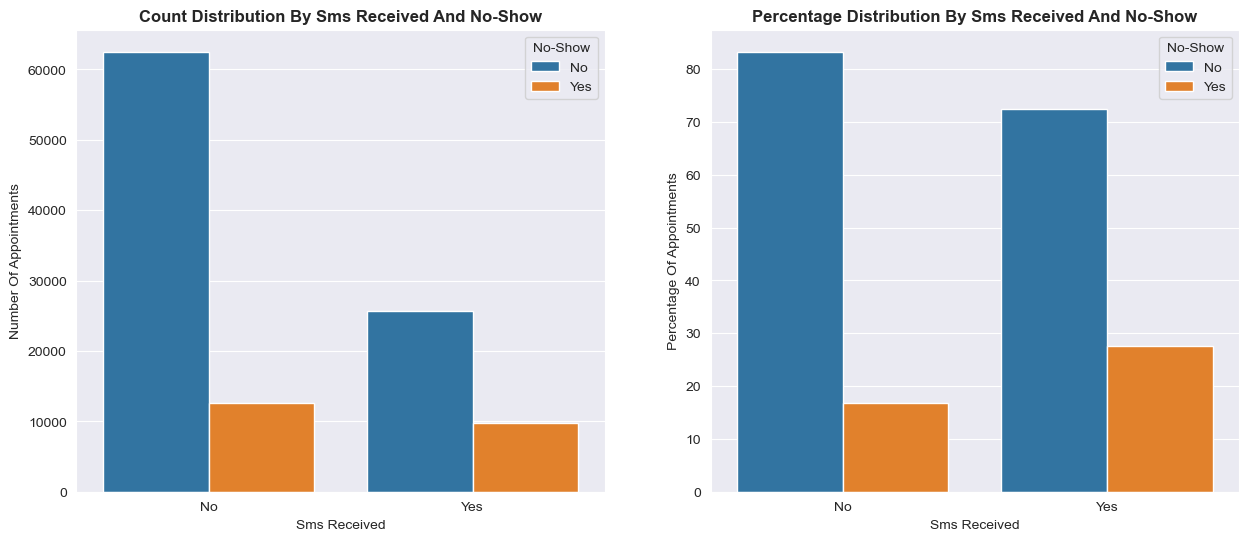

In [190]:
# Create the visuals for the sms_received column
create_visuals(df, 'sms_received', xticklabels=['No', 'Yes'])

Inspite of expecting that sending sms will reduce the number of No-show appointments, on the contrary, we observe that the percentage proprotion of No-show appointments for those patients who recieved a SMS are almost double to those who didn't recieve them and are over the overall percentage at more than **7%** the overall **20%** percent.

<a id='conclusions'></a>
## Conclusions

#### Research Question 1: What is the percentage of the scheduled appointments that are a no-show?

That an average of ***20.19%*** of appointments are No-shows. Which is more than a fifth of the appointments.

#### Research Question 2: What groups of patients are a no-show for their scheduled appointments more often?

Here the following can be concluded through the EDA done:
1. That patients in their teens have higher No-show proportions with lower proportions for your ages and decreasing proportions as their ages increase.

2. Although females patients have high appointments unlike the males, the proportion of No-shows are almost the same as the males with less than *+0.5%* difference in these proportions for the females.

3. For the Handicap category, the handicap category 4 has the highest proportion of is appointments having No-show.

4. Patients with scholarships have higher than average proportion for No-shows, i.e. *23.73%*, which is more than the average.

5. Patients with hypertension or diabetes have lower proportions of their appointments having No-show, hence these class of patients will be more likely to show up for their appointments.

6. Lastly, alcoholism doesn't influence the No-show appointments, since the proportion of alcoholic and non-alcoholic No-shows is approximately the same, with actually the alcoholic ones being slightly lower.

#### Research Question 3: Does day of the of the scheduled appointment and duration between the schedule day and appointment day affect the number of appointments with no-show?

For these question, we can conclude that:

1. Patients exhibit higher proportions of No-shows to their appointments on Saturdays and Fridays compared to other days. This might be due to the fact that patients are in the weekend mood!

2. Appointments with longer waiting periods between day of scheduling their appoinments and the actual appointment day, experience more No-shows. This might be to the fact that people tend to forget appointments further into the future, especially those  appointments with more than a month of waiting.

#### Research Question 4: How does sending an sms for the scheduled appointment have an effect to the no-show appointments?

Finally, we can ascertain that sending reminder sms, doesn't in anyway influence positively in reducing the number of No-show appointments.  Actually, the proportion of No-show appointments for those patient who recieved reminders are higher than the ones who didn't recieve the reminder (almost double)!


<a id='limitations'></a>
## Limitations

Since a majority of the variables (columns) are categorical data types, consequently raising a reliability issue of the analysis due to the limited analytical techniques that can be applied on them.

Lastly, the data missed some important variables such as the patients' travel distance to the hospital, financial status, family and even educational level that could have increased the reliabilty of the analysis.